In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [12]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
# dataset have?

In [3]:
df_flight=pd.read_excel('flight_price.xlsx')

In [4]:
df_flight.shape

(10683, 11)

In [5]:
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

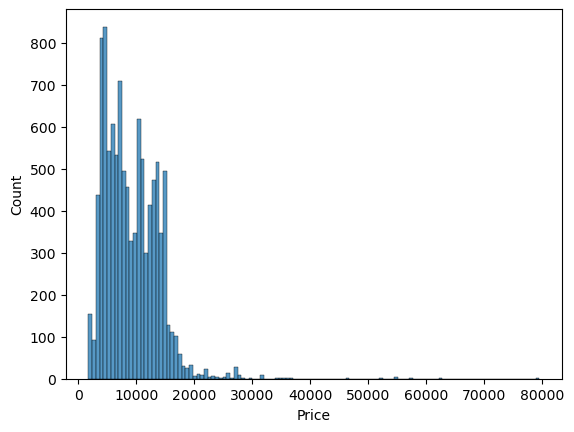

In [7]:
sns.histplot(data=df_flight,x='Price')

In [8]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [9]:
df_flight['Price'].max()

79512

In [10]:
df_flight['Price'].min()

1759

In [11]:
df_flight['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [12]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
# airlines.

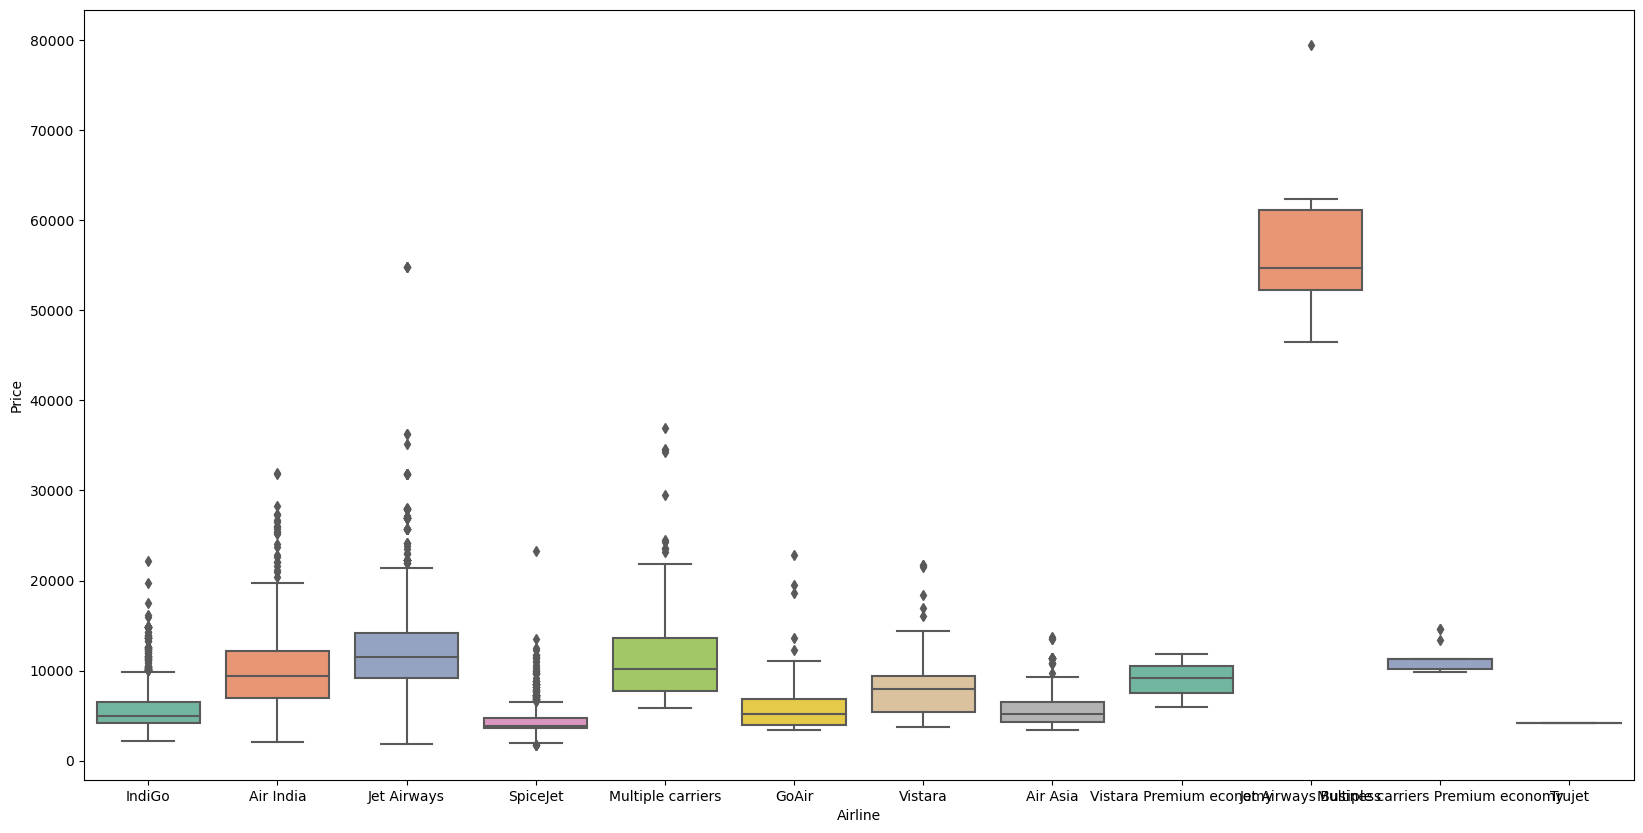

In [21]:
plt.figure(figsize=(20,10) )
sns.boxplot(data=df_flight,x='Airline',y='Price',palette='Set2')
plt.show()

In [22]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
# they may impact your analysis.

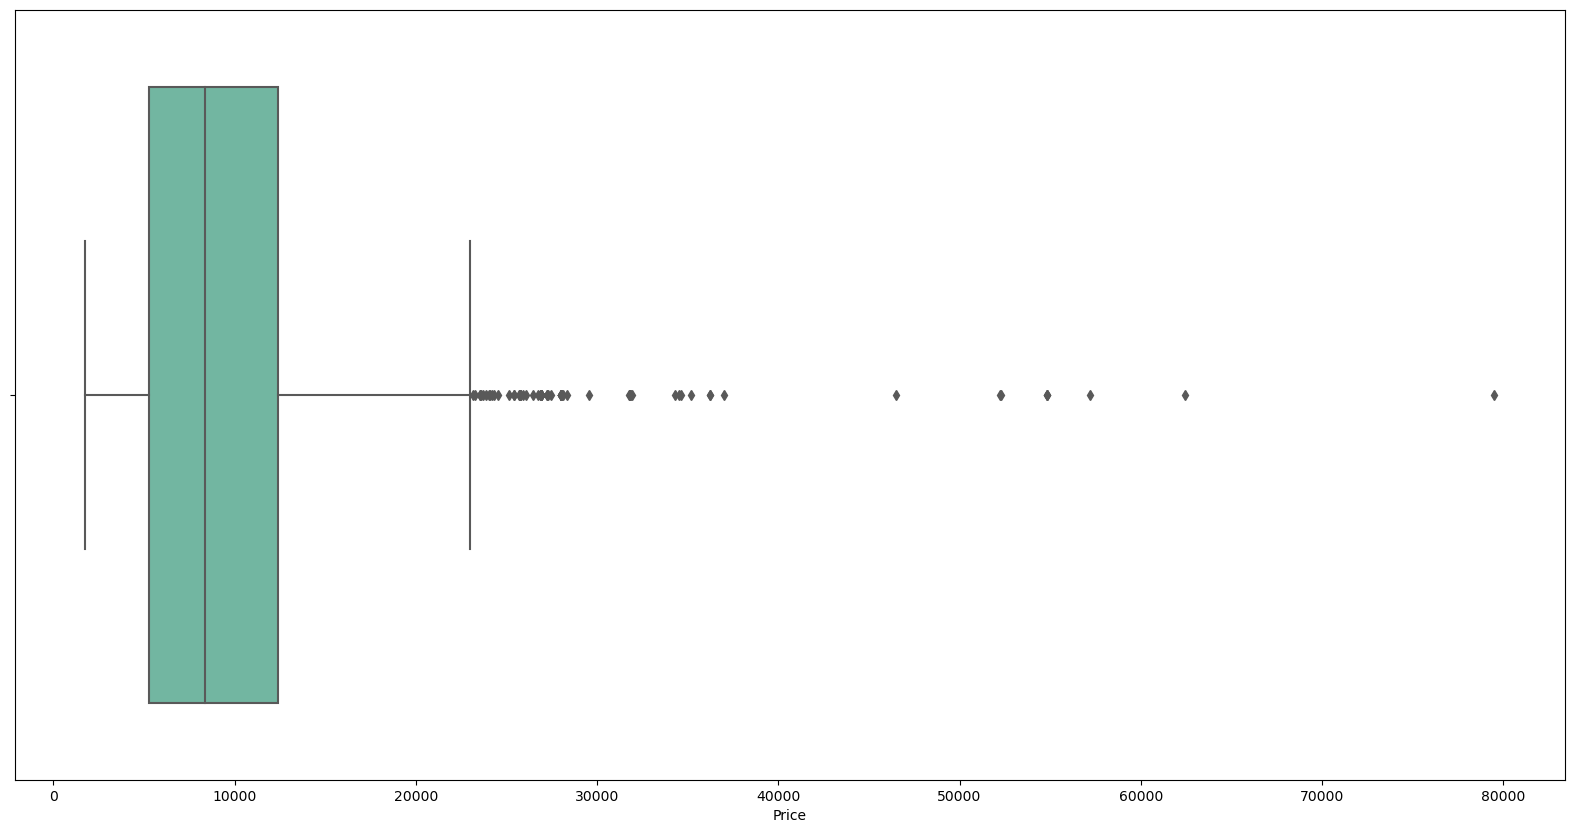

In [23]:
plt.figure(figsize=(20,10) )
sns.boxplot(data=df_flight,x='Price',palette='Set2')
plt.show()

In [24]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
# to identify the peak travel season. What features would you analyze to identify the peak season, and how
# would you present your findings to your boss?

In [25]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
df_flight['date']=df_flight['Date_of_Journey'].str.split('/').str[0]
df_flight['month']=df_flight['Date_of_Journey'].str.split('/').str[1]
df_flight['year']=df_flight['Date_of_Journey'].str.split('/').str[2]

In [27]:
df_flight['date']=df_flight['date'].astype(int)
df_flight['month']=df_flight['month'].astype(int)
df_flight['year']=df_flight['year'].astype(int)

In [28]:
df_flight.drop('Date_of_Journey',inplace=True,axis=1)

In [29]:
df_flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [36]:
df_range=pd.DataFrame(df_flight.groupby('month')[['Airline']].count().reset_index())

In [37]:
df_range.head()

,month,Airline
0,3,2724
1,4,1079
2,5,3466
3,6,3414


<AxesSubplot: xlabel='month', ylabel='Airline'>

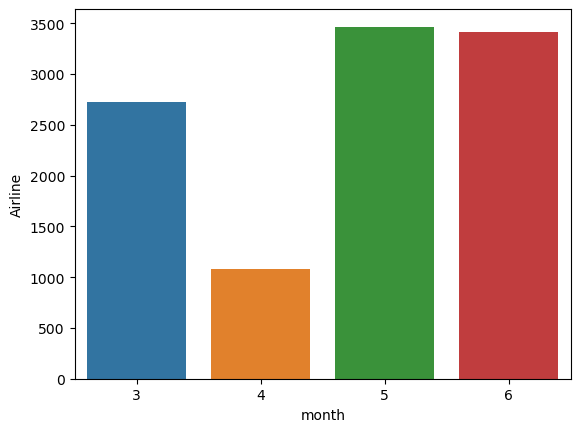

In [57]:
sns.barplot(data=df_range,x='month',y='Airline')

In [39]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?

<AxesSubplot: xlabel='month', ylabel='Price'>

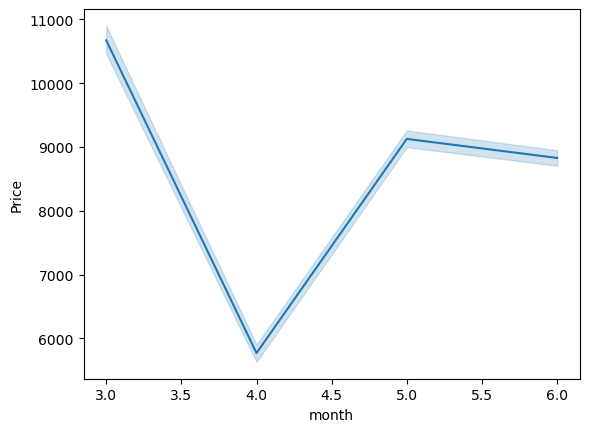

In [40]:
sns.lineplot(data=df_flight,x='month',y='Price')

In [49]:
grouped_data=pd.DataFrame(df_flight.groupby(['month','Destination'])['year'].count().reset_index())

In [50]:
grouped_data.rename(columns={'year':'count'},inplace=True)

In [51]:
grouped_data

,month,Destination,count
0,3,Banglore,335
1,3,Cochin,1094
2,3,Hyderabad,247
3,3,Kolkata,116
4,3,New Delhi,932
5,4,Banglore,376
6,4,Cochin,241
7,4,Delhi,423
8,4,Hyderabad,39
9,5,Banglore,1470


<AxesSubplot: xlabel='Destination', ylabel='count'>

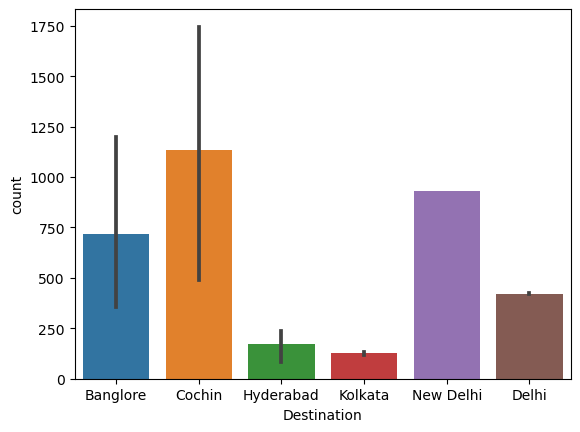

In [54]:
sns.barplot(data=grouped_data,x='Destination',y='count')

<AxesSubplot: xlabel='Price', ylabel='Count'>

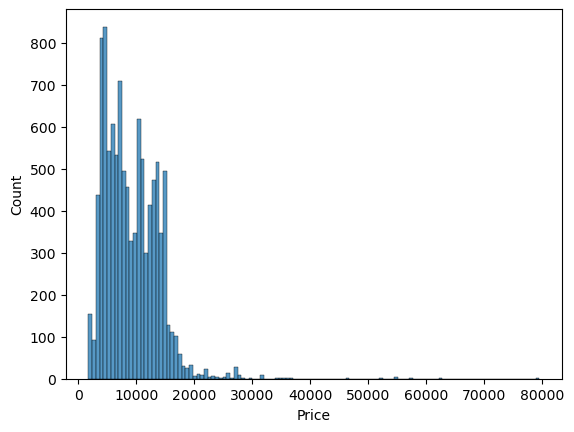

In [55]:
sns.histplot(data=df_flight,x='Price')

In [63]:
grouped_data_1=pd.DataFrame(df_flight.groupby(['Destination','Airline'])['year'].count().reset_index())

In [64]:
grouped_data_1

,Destination,Airline,year
0,Banglore,Air Asia,150
1,Banglore,Air India,512
2,Banglore,GoAir,25
3,Banglore,IndiGo,445
4,Banglore,Jet Airways,1256
5,Banglore,SpiceJet,300
6,Banglore,Vistara,183
7,Cochin,Air Asia,80
8,Cochin,Air India,747
9,Cochin,GoAir,76


In [65]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
# identify these factors, and how would you present your findings to the management team?

In [66]:
df_flight['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [67]:
df_flight['arival_hours']=df_flight['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df_flight['arival_minutes']=df_flight['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [68]:
df_flight.drop('Arrival_Time',inplace=True,axis=1)

In [70]:
df_flight['arival_hours']=df_flight['arival_hours'].astype(int)
df_flight['arival_minutes']=df_flight['arival_minutes'].astype(int)

In [71]:
df_flight['Dep_hour']=df_flight['Dep_Time'].str.split(' ').str[0].str.split(':').str[0]
df_flight['Dep_minute']=df_flight['Dep_Time'].str.split(' ').str[0].str.split(':').str[1]
df_flight.drop('Dep_Time',inplace=True,axis=1)
df_flight['Dep_hour']=df_flight['Dep_hour'].astype(int)
df_flight['Dep_minute']=df_flight['Dep_minute'].astype(int)

In [72]:
df_flight.drop('Route',axis=1,inplace=True)

In [73]:
df_flight['duration_hour']=df_flight['Duration'].str.split(' ').str[0].str.split('h').str[0]
df_flight['duration_minute']=df_flight['Duration'].str.split(' ').str[1].str.split('m').str[0]
df_flight.drop('Duration',inplace=True,axis=1)

In [74]:
df_flight['Total_Stops']=df_flight['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

In [76]:
encoder=OneHotEncoder()

In [78]:
df_final=pd.DataFrame(encoder.fit_transform(df_flight[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [84]:
df_final.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
df_flight.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hours,arival_minutes,Dep_hour,Dep_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [90]:
pd.DataFrame(df_flight.groupby('Airline')['Price'].mean().sort_values(ascending=False))

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9611.210616
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


jet Airways has highest Average price of flight

In [91]:
pd.DataFrame(df_flight.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False))

,Price
Total_Stops,
4,17686.000000
3,13112.000000
2,12715.807895
1,10593.570032
0,5024.900315


when Stops increases Avergae price of flight increases

In [93]:
pd.DataFrame(df_flight.groupby(['Destination'])['year'].count().sort_values(ascending=False).reset_index())

,Destination,year
0,Cochin,4537
1,Banglore,2871
2,Delhi,1265
3,New Delhi,932
4,Hyderabad,697
5,Kolkata,381


most of the flights are To Cochin 

In [2]:
## Google play store

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.shape

(10841, 13)

In [7]:
# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
# app categories.

<AxesSubplot: xlabel='Category', ylabel='Rating'>

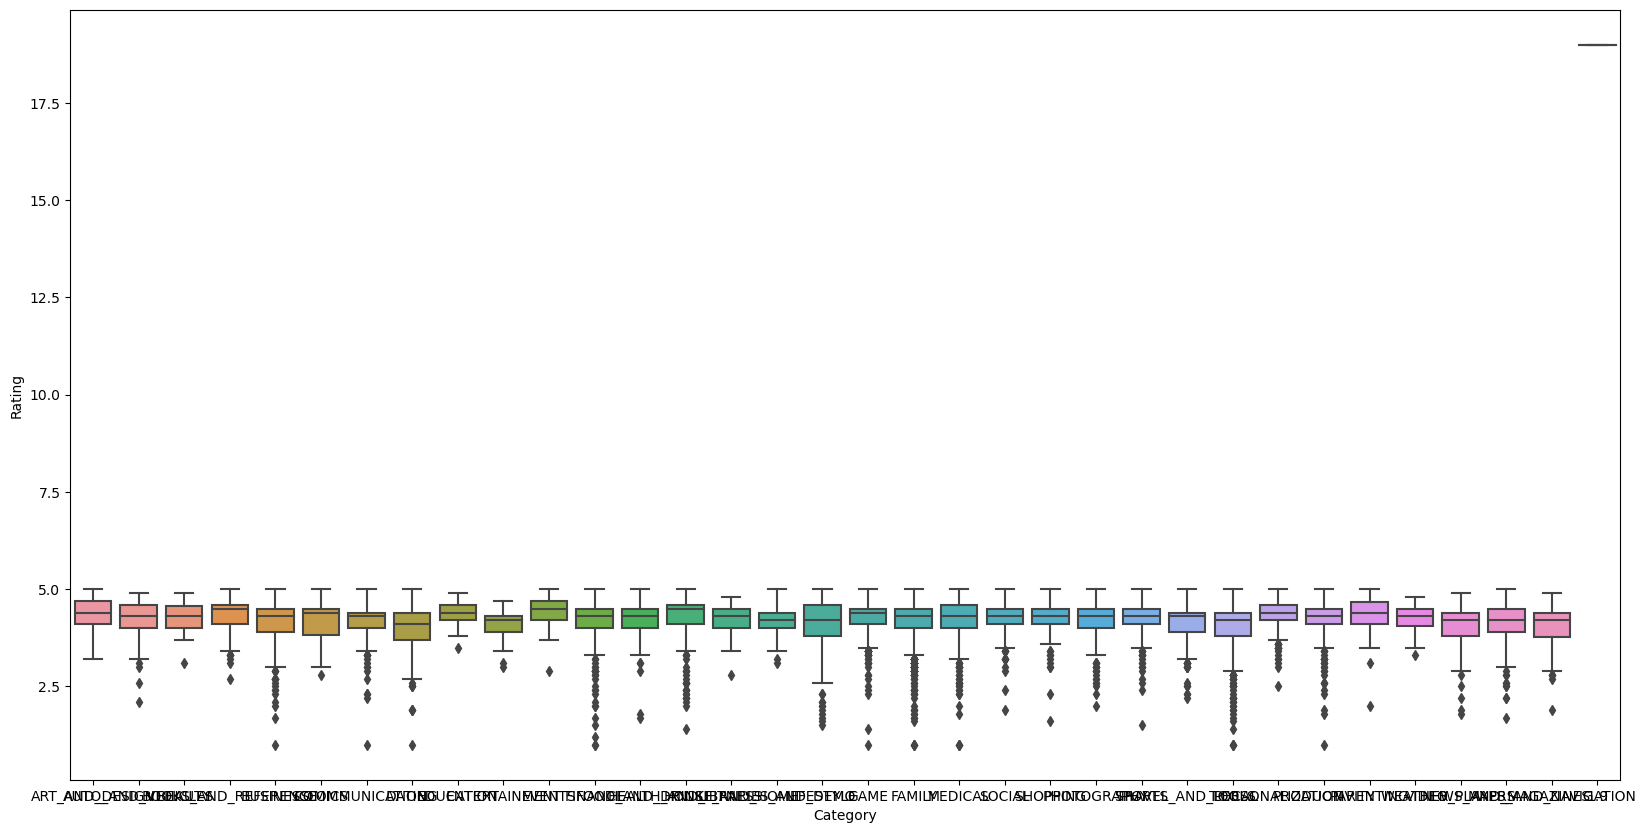

In [14]:
plt.figure(figsize=(20,10))
#sns.boxplot(data=df[df['Category']=='ART_AND_DESIGN'],x='Category',y='Rating')
sns.boxplot(data=df,x='Category',y='Rating')

In [15]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
# impact your analysis.

In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
df[df['Rating'].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Rating has maximum missing values, it will impact my tarin and test data set which will help in making prediction of rating about an app


In [18]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
# # the relationship.

In [30]:
df['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [22]:
df['Size']=df['Size'].str.replace('M','000')

In [23]:
df['Size']=df['Size'].str.replace('k','')

In [28]:
df['Size']=df['Size'].replace('Varies with device',np.nan)

In [35]:
df['Size']=df['Size'].astype(float)

In [34]:
df[df['Size']=='1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
df.drop(index=10472,axis=0,inplace=True)

<AxesSubplot: xlabel='Rating', ylabel='Size'>

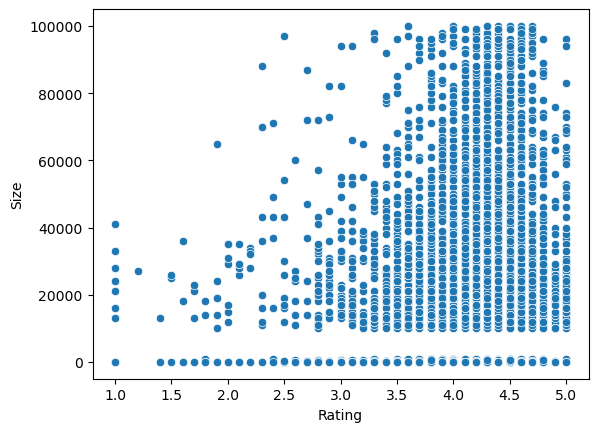

In [36]:
sns.scatterplot(data=df,x='Rating',y='Size')

In [37]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [53]:
df_type_price=df.groupby('Type')[['Price']].mean().reset_index()

In [48]:
df['Price']=df['Price'].str.replace('$','')

In [50]:
df['Price']=df['Price'].astype(float)

<AxesSubplot: xlabel='Type', ylabel='Price'>

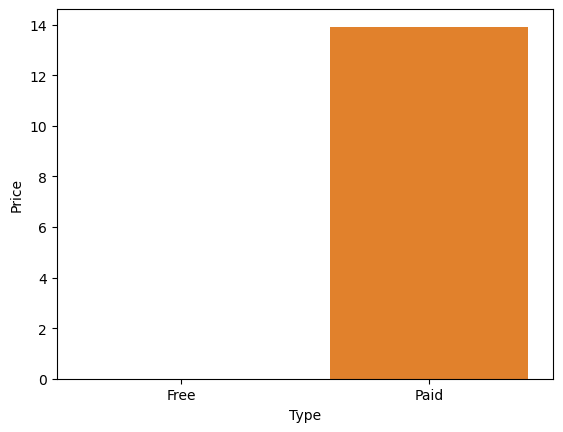

In [56]:
sns.barplot(data=df_type_price,x='Type',y='Price')

In [57]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
# with the highest number of installs.

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
df_sort=df.sort_values(by='Rating',ascending=False).head(10)

In [67]:
df_sort[['App','Rating']]

,App,Rating
9056,Santa's Monster Shootout DX,5.0
8395,DG TV,5.0
8493,PK and DK Audio App,5.0
6330,HON. B.J. ACS COLLEGE ALE,5.0
6342,BJ Foods,5.0
6363,Read it easy for BK,5.0
9766,ER Assist,5.0
6364,BK Video Status,5.0
6372,BK Formula Calculator,5.0
6375,Dr Bk Sachin bhai,5.0


In [73]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [69]:
df['Installs']=df['Installs'].str.replace('+','')

In [72]:
df['Installs']=df['Installs'].str.replace(',','')

In [75]:
df['Installs']=df['Installs'].astype(int)

In [84]:
df_freq_table=df.groupby('App')[['Installs']].sum().reset_index().sort_values(by='Installs',ascending=False).head(10)

In [86]:
df_freq_table['Installs_M']=df_freq_table['Installs']/1000000

In [87]:
df_freq_table

,App,Installs,Installs_M
8079,Subway Surfers,6000000000,6000.0
4933,Google News,4000000000,4000.0
5118,Hangouts,4000000000,4000.0
4924,Google Drive,4000000000,4000.0
4937,Google Photos,4000000000,4000.0
5399,Instagram,4000000000,4000.0
2364,Candy Crush Saga,3500000000,3500.0
6050,Maps - Navigate & Explore,3000000000,3000.0
4921,Google Chrome: Fast & Secure,3000000000,3000.0
9041,WhatsApp Messenger,3000000000,3000.0


In [88]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
# Google Playstore dataset to identify the most popular app categories. How would you approach this
# task, and what features would you analyze to make recommendations to the company?

In [89]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
df_popular_category=df.groupby('Category')[['Installs']].sum().reset_index().sort_values(by='Installs',ascending=False).head(10)

In [91]:
df_popular_category

,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915
11,FAMILY,10258263505
24,PHOTOGRAPHY,10088247655
21,NEWS_AND_MAGAZINES,7496317760
30,TRAVEL_AND_LOCAL,6868887146
31,VIDEO_PLAYERS,6222002720


as per install , game category is most download category

In [92]:
# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
# most successful app developers. What features would you analyze to make recommendations to the
# company, and what data visualizations would you use to present your findings?

In [93]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [94]:
df_freq_table

,App,Installs,Installs_M
8079,Subway Surfers,6000000000,6000.0
4933,Google News,4000000000,4000.0
5118,Hangouts,4000000000,4000.0
4924,Google Drive,4000000000,4000.0
4937,Google Photos,4000000000,4000.0
5399,Instagram,4000000000,4000.0
2364,Candy Crush Saga,3500000000,3500.0
6050,Maps - Navigate & Explore,3000000000,3000.0
4921,Google Chrome: Fast & Secure,3000000000,3000.0
9041,WhatsApp Messenger,3000000000,3000.0


In [95]:
df_popular_category

,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915
11,FAMILY,10258263505
24,PHOTOGRAPHY,10088247655
21,NEWS_AND_MAGAZINES,7496317760
30,TRAVEL_AND_LOCAL,6868887146
31,VIDEO_PLAYERS,6222002720


In [97]:
df_popular_App_Rating=df.groupby('App')[['Rating']].mean().reset_index().sort_values(by='Rating',ascending=False).head(10)

In [98]:
df_popular_App_Rating

,App,Rating
267,AJ Rafael Music Lessons,5.0
3548,EC Calgary,5.0
2584,Cloud DX Connected Health,5.0
3538,EB Scanner,5.0
2051,CJ Gospel Hour,5.0
3531,EB Cash Collections,5.0
4209,FK CLASSIC FOR YOU,5.0
6509,NOMISMA.com.cy by FMW,5.0
8816,Victoria EC,5.0
7945,South Florida AA Meetings,5.0


In [99]:
# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
# launch a new app. What features would you analyze to make recommendations to the company, and
# what data visualizations would you use to present your findings?

need to check app launch date ,and check thr trend over years to check its downlaod, will check the typr also if it is free or paid